In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('../data/data_work.csv')
df2 = pd.read_csv('../data/data_work_2.csv')


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2744 non-null   object
 1   Condition     2744 non-null   object
 2   Size          2744 non-null   object
 3   Wheel_Size    2744 non-null   object
 4   Material      2744 non-null   object
 5   Front_travel  2744 non-null   object
 6   Rear_travel   2744 non-null   object
 7   Price         2744 non-null   object
 8   Currance      2744 non-null   object
 9   Unnamed: 9    1 non-null      object
dtypes: object(10)
memory usage: 214.5+ KB


In [4]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3672 non-null   object
 1   Condition     3672 non-null   object
 2   Frame Size    3672 non-null   object
 3   Wheel Size    3672 non-null   object
 4   Material      3672 non-null   object
 5   Front Travel  3672 non-null   object
 6   Rear Travel   3672 non-null   object
 7   Price         3672 non-null   object
dtypes: object(8)
memory usage: 229.6+ KB


In [5]:
df1.head()

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currance,Unnamed: 9
0,NS Carbon Define 130/150 Size Medium,Excellent,M,"29""",Carbon,160,155,4600,USD,NaN
1,Santa Cruz Tallboy A D build Large,Excellent,L,"29""",Aluminium,120,110,1800,USD,NaN
2,Santa Cruz Bronson C medium,Excellent,M,"27.5""",Carbon,150,150,2950,USD,NaN
3,Kona Honzo ST,Excellent,XL,"29""",Steel,140,0,2500,CAD,NaN
4,Intense Primer 275 Medium Blue Expert,New,Wheel,Material:,"29""",Front,Rear,3799,USD,NaN


In [6]:
def Check_Material(string):
    if string == 'Aluminium' or string == 'Carbon Fiber' or string == 'Chromoly' or string== 'Steel' or string =='Titanium':
        return True
    else:
        return False
    
def convert_wheel_string(input_string):
    if input_string == '29"':
        return 29
    elif input_string == '27.5"':
        return 27.5
def convert_string_flt(input_string):
    nums = '1234567890.'
    string = ''
    for char in input_string:
        if char in nums:
            string+= char
    return float(string)

def check_rear_string(x):
    if len(x)>3:
        return True
    else:
        return False
def rear_travel_clean(x):
    if x =="Travel:":
        return False
    else:
        return True

In [7]:
df1.drop(axis = 1,labels = 'Unnamed: 9',inplace=True)

In [8]:
df1 = df1[df1['Material'].apply(lambda x : Check_Material(x))].copy()

In [9]:
df1['Wheel_Size'] = df1['Wheel_Size'].apply(lambda x : convert_wheel_string(x))

In [10]:
df1['Front_travel'] = df1['Front_travel'].apply(convert_string_flt)

In [11]:
df1 = df1[df1['Rear_travel'].apply(rear_travel_clean)]
df1['Rear_travel'] = df1['Rear_travel'].apply(convert_string_flt)

In [12]:
df1['Price'] = df1['Price'].apply(convert_string_flt)

In [13]:
def check_currancy(price,currancy,exch_rate=.74):
    if currancy == 'CAD':
        return price*exch_rate
    else:
        return price

In [14]:
df1['Price']=df1[['Price','Currance']].apply(lambda x: check_currancy(x.Price,x.Currance),axis=1)

In [15]:
df2.loc[0,'Wheel Size']

'29'

In [16]:
def clean_wheel_size_df2(string):
    if string == '29':
        return 29.0
    elif string == '275  650B':
        return 27.5
    else:
        return string

In [17]:
df2['Wheel Size'] = df2["Wheel Size"].apply(clean_wheel_size_df2)

In [18]:
type(df2.loc[0,'Wheel Size'])

float

In [19]:
df2.head()

,Title,Condition,Frame Size,Wheel Size,Material,Front Travel,Rear Travel,Price
0,2019 Specialized Stumpjumper Short Travel Comp...,Excellent,XL,29,Carbon Fiber,130 mm,120 mm,3000 USD
1,2018 Santa Cruz Chameleon,Excellent,XL,29,Aluminium,140 mm,0 mm Hardtail,2500 CAD
2,2018 Large Chromag Primer,Excellent,L,29,Chromoly,160 mm,0 mm Hardtail,3200 CAD
3,2015 Cove Hustler,Excellent,18,27.5,Aluminium,160 mm,150 mm,2375 CAD
4,2019 Pivot Firebird 29,Good,L,29,Carbon Fiber,170 mm,160 mm,4500 USD


In [20]:
df2['Front Travel']=df2['Front Travel'].apply(convert_string_flt)

In [21]:
df2['Rear Travel']=df2['Rear Travel'].apply(convert_string_flt)

In [22]:
def return_curr(string):
    if 'USD' in string:
        return 'USD'
    elif 'CAD' in string:
        return 'CAD'

In [23]:
df2['Currance'] = df2['Price'].apply(return_curr)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3672 non-null   object 
 1   Condition     3672 non-null   object 
 2   Frame Size    3672 non-null   object 
 3   Wheel Size    3672 non-null   object 
 4   Material      3672 non-null   object 
 5   Front Travel  3672 non-null   float64
 6   Rear Travel   3672 non-null   float64
 7   Price         3672 non-null   object 
 8   Currance      3588 non-null   object 
dtypes: float64(2), object(7)
memory usage: 258.3+ KB


In [25]:
def remove_other_wheels(obj):
    if type(obj)== float:
        return True
    else:
        return False

In [26]:
df2 = df2[df2['Wheel Size'].apply(remove_other_wheels)]

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3356 non-null   object 
 1   Condition     3356 non-null   object 
 2   Frame Size    3356 non-null   object 
 3   Wheel Size    3356 non-null   object 
 4   Material      3356 non-null   object 
 5   Front Travel  3356 non-null   float64
 6   Rear Travel   3356 non-null   float64
 7   Price         3356 non-null   object 
 8   Currance      3307 non-null   object 
dtypes: float64(2), object(7)
memory usage: 262.2+ KB


In [28]:
def remove_resonable_trades(input_string):
    if 'CAD' in input_string or 'USD' in input_string:
        return True
    else:
        return False

In [29]:
df2 = df2[df2['Price'].apply(lambda x : remove_resonable_trades(x))]

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307 entries, 0 to 3671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3307 non-null   object 
 1   Condition     3307 non-null   object 
 2   Frame Size    3307 non-null   object 
 3   Wheel Size    3307 non-null   object 
 4   Material      3307 non-null   object 
 5   Front Travel  3307 non-null   float64
 6   Rear Travel   3307 non-null   float64
 7   Price         3307 non-null   object 
 8   Currance      3307 non-null   object 
dtypes: float64(2), object(7)
memory usage: 258.4+ KB


In [31]:
df2['Price'] = df2['Price'].apply(convert_string_flt)

In [32]:
df2.head()

,Title,Condition,Frame Size,Wheel Size,Material,Front Travel,Rear Travel,Price,Currance
0,2019 Specialized Stumpjumper Short Travel Comp...,Excellent,XL,29,Carbon Fiber,130.0,120.0,3000.0,USD
1,2018 Santa Cruz Chameleon,Excellent,XL,29,Aluminium,140.0,0.0,2500.0,CAD
2,2018 Large Chromag Primer,Excellent,L,29,Chromoly,160.0,0.0,3200.0,CAD
3,2015 Cove Hustler,Excellent,18,27.5,Aluminium,160.0,150.0,2375.0,CAD
4,2019 Pivot Firebird 29,Good,L,29,Carbon Fiber,170.0,160.0,4500.0,USD


In [33]:
df2['Price']=df2[['Price','Currance']].apply(lambda x: check_currancy(x['Price'],x['Currance']),axis=1)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307 entries, 0 to 3671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3307 non-null   object 
 1   Condition     3307 non-null   object 
 2   Frame Size    3307 non-null   object 
 3   Wheel Size    3307 non-null   object 
 4   Material      3307 non-null   object 
 5   Front Travel  3307 non-null   float64
 6   Rear Travel   3307 non-null   float64
 7   Price         3307 non-null   float64
 8   Currance      3307 non-null   object 
dtypes: float64(3), object(6)
memory usage: 258.4+ KB


In [35]:
df1.head()

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currance
1,Santa Cruz Tallboy A D build Large,Excellent,L,29.0,Aluminium,120.0,110.0,1800.0,USD
3,Kona Honzo ST,Excellent,XL,29.0,Steel,140.0,0.0,1850.0,CAD
5,Norco Sight A1,Excellent,L,29.0,Aluminium,160.0,150.0,3848.0,CAD
9,Transition Sentinel GX Alloy Large w/ 210mm Dr...,Good,L,29.0,Aluminium,160.0,140.0,2900.0,USD
10,NS Eccentric Chromo - Medium,Good,M,29.0,Chromoly,150.0,0.0,1600.0,USD


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 1 to 2741
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         616 non-null    object 
 1   Condition     616 non-null    object 
 2   Size          616 non-null    object 
 3   Wheel_Size    616 non-null    float64
 4   Material      616 non-null    object 
 5   Front_travel  616 non-null    float64
 6   Rear_travel   616 non-null    float64
 7   Price         616 non-null    float64
 8   Currance      616 non-null    object 
dtypes: float64(4), object(5)
memory usage: 48.1+ KB


In [37]:
df2.columns

Index(['Title', 'Condition', 'Frame Size', 'Wheel Size', 'Material',
       'Front Travel', 'Rear Travel', 'Price', 'Currance'],
      dtype='object')

In [38]:
df1.columns

Index(['Title', 'Condition', 'Size', 'Wheel_Size', 'Material', 'Front_travel',
       'Rear_travel', 'Price', 'Currance'],
      dtype='object')

In [39]:
df2.rename(columns={'Frame Size':'Size','Wheel Size':'Wheel_Size',
                    'Front Travel':'Front_travel','Rear Travel':'Rear_travel','Currance':'Currency'},inplace=True)

In [40]:
df1.rename(columns={'Currance':'Currency'},inplace=True)

In [41]:
df1.columns

Index(['Title', 'Condition', 'Size', 'Wheel_Size', 'Material', 'Front_travel',
       'Rear_travel', 'Price', 'Currency'],
      dtype='object')

In [42]:
df2.columns

Index(['Title', 'Condition', 'Size', 'Wheel_Size', 'Material', 'Front_travel',
       'Rear_travel', 'Price', 'Currency'],
      dtype='object')

In [43]:
df = pd.concat([df1,df2])

In [44]:
df.head()

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currency
1,Santa Cruz Tallboy A D build Large,Excellent,L,29,Aluminium,120.0,110.0,1800.0,USD
3,Kona Honzo ST,Excellent,XL,29,Steel,140.0,0.0,1850.0,CAD
5,Norco Sight A1,Excellent,L,29,Aluminium,160.0,150.0,3848.0,CAD
9,Transition Sentinel GX Alloy Large w/ 210mm Dr...,Good,L,29,Aluminium,160.0,140.0,2900.0,USD
10,NS Eccentric Chromo - Medium,Good,M,29,Chromoly,150.0,0.0,1600.0,USD


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 1 to 3671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3923 non-null   object 
 1   Condition     3923 non-null   object 
 2   Size          3923 non-null   object 
 3   Wheel_Size    3923 non-null   object 
 4   Material      3923 non-null   object 
 5   Front_travel  3923 non-null   float64
 6   Rear_travel   3923 non-null   float64
 7   Price         3923 non-null   float64
 8   Currency      3923 non-null   object 
dtypes: float64(3), object(6)
memory usage: 306.5+ KB


In [46]:
df.head()

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currency
1,Santa Cruz Tallboy A D build Large,Excellent,L,29,Aluminium,120.0,110.0,1800.0,USD
3,Kona Honzo ST,Excellent,XL,29,Steel,140.0,0.0,1850.0,CAD
5,Norco Sight A1,Excellent,L,29,Aluminium,160.0,150.0,3848.0,CAD
9,Transition Sentinel GX Alloy Large w/ 210mm Dr...,Good,L,29,Aluminium,160.0,140.0,2900.0,USD
10,NS Eccentric Chromo - Medium,Good,M,29,Chromoly,150.0,0.0,1600.0,USD


In [47]:
df.tail(1)

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currency
3671,2016 Specialized Camber Expert Carbon with car...,Excellent,L,29,Carbon Fiber,130.0,110.0,2738.0,CAD


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 1 to 3671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3923 non-null   object 
 1   Condition     3923 non-null   object 
 2   Size          3923 non-null   object 
 3   Wheel_Size    3923 non-null   object 
 4   Material      3923 non-null   object 
 5   Front_travel  3923 non-null   float64
 6   Rear_travel   3923 non-null   float64
 7   Price         3923 non-null   float64
 8   Currency      3923 non-null   object 
dtypes: float64(3), object(6)
memory usage: 306.5+ KB


In [51]:
df['Price'].max()

739999.26

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currency
1238,WTB: Trek Stache 7,Excellent,"17.5""",29,Aluminium,120.0,0.0,739999.26,CAD


In [53]:
df = df[df['Price']<12000]

In [54]:
df['Price'].max()

9975.0

In [58]:
df[df['Wheel_Size']==27.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 14 to 3668
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         2230 non-null   object 
 1   Condition     2230 non-null   object 
 2   Size          2230 non-null   object 
 3   Wheel_Size    2230 non-null   object 
 4   Material      2230 non-null   object 
 5   Front_travel  2230 non-null   float64
 6   Rear_travel   2230 non-null   float64
 7   Price         2230 non-null   float64
 8   Currency      2230 non-null   object 
dtypes: float64(3), object(6)
memory usage: 174.2+ KB


In [59]:
df.groupby('Wheel_Size').count()

,Title,Condition,Size,Material,Front_travel,Rear_travel,Price,Currency
Wheel_Size,,,,,,,,
27.5,2230,2230,2230,2230,2230,2230,2230,2230
29.0,1689,1689,1689,1689,1689,1689,1689,1689


In [65]:
df.head()

,Title,Condition,Size,Wheel_Size,Material,Front_travel,Rear_travel,Price,Currency
1,Santa Cruz Tallboy A D build Large,Excellent,L,29,Aluminium,120.0,110.0,1800.0,USD
3,Kona Honzo ST,Excellent,XL,29,Steel,140.0,0.0,1850.0,CAD
5,Norco Sight A1,Excellent,L,29,Aluminium,160.0,150.0,3848.0,CAD
9,Transition Sentinel GX Alloy Large w/ 210mm Dr...,Good,L,29,Aluminium,160.0,140.0,2900.0,USD
10,NS Eccentric Chromo - Medium,Good,M,29,Chromoly,150.0,0.0,1600.0,USD


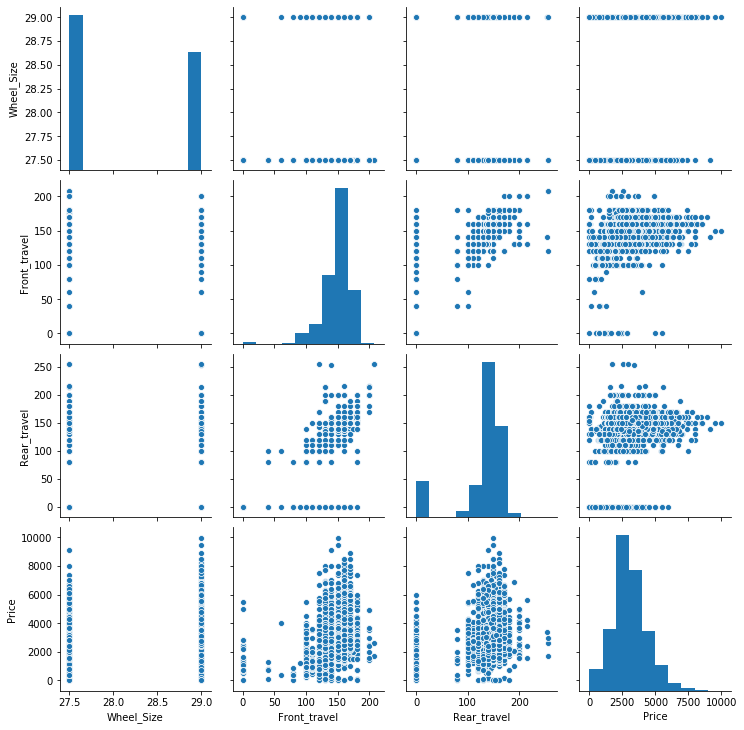

In [67]:
sns.pairplot(df)

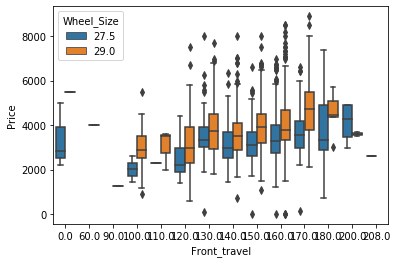

In [74]:
sns.boxplot(x='Front_travel',y='Price',data = df[df["Material"]== 'Carbon Fiber'],hue="Wheel_Size")

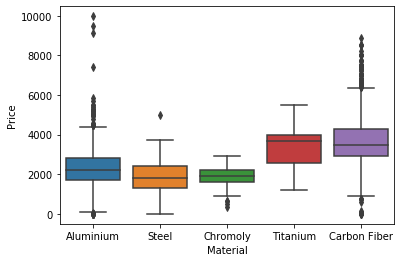

In [70]:
sns.boxplot(x='Material',y='Price',data=df)